In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supervised ML workflow



In [2]:
df= pd.read_csv("salaries_clean.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,338349.8
1,1.3,397363.0
2,1.5,324486.6
3,2.0,374315.0
4,2.2,343062.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## X AND Y

In [5]:
X= df.drop(columns="Salary")
y = df["Salary"]

# Train test splict

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=1/3)

# `train model`

In [8]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [9]:
reg_model.fit(X_train, y_train)

LinearRegression()

### Undrstanding the model
        - mainly for learning process(not part of the workflow)

In [10]:
reg_model.intercept_

217789.2842615011

In [11]:
reg_model.coef_

array([81063.93341404])

In [14]:
reg_model.predict(X_train)

array([ 396129.9377724 ,  631215.34467312,  452874.69116223,
        550151.41125908,  542045.01791768,  858194.35823245,
        323172.39769976,  339385.18438257,  947364.68498789,
        379917.15108959,  793343.21150121,  987896.65169492,
        696066.49140436, 1068960.58510896,  769024.031477  ,
        477193.87118644,  533938.62457627,  582576.9846247 ,
        704172.88474576,  460981.08450363])

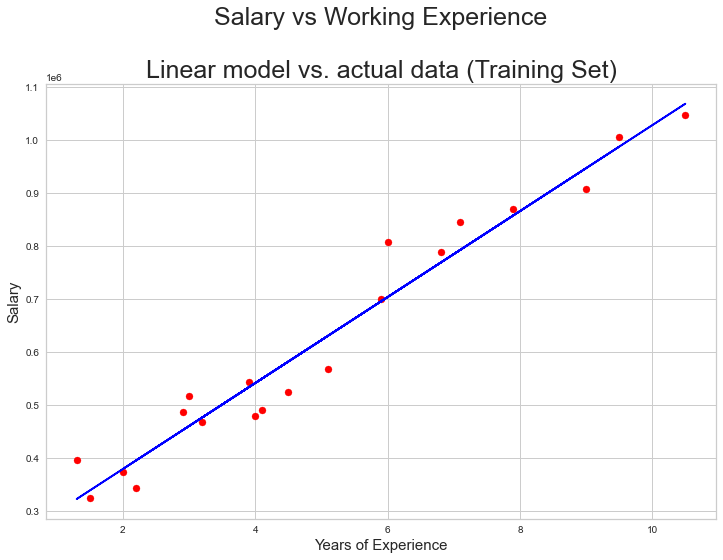

In [15]:
# Visualising the Training set results
plt.figure(figsize = (12,8))

# Scatter plot with original training data
plt.scatter(X_train, y_train, color='red')

# Linear model
plt.plot(X_train, reg_model.predict(X_train), color='blue')

plt.title('Salary vs Working Experience\n\nLinear model vs. actual data (Training Set)', fontsize = 25)
plt.xlabel('Years of Experience', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.show()

# Evaluating model performance on training data

Metrics in sklearn:
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
___
Metrics we will look at:
- r2 score
- mean squared error

### r2 score

- models ability to explain the variance in the target variable

In [16]:
from sklearn.metrics import r2_score

In [17]:
# Y-true, y_pred

r2_score(y_train, reg_model.predict(X_train))

0.9549236946181227

## mean squared error

![mean squared error](https://www.gstatic.com/education/formulas2/355397047/en/mean_squared_error.svg)

- If you are not familiar with reading math formulas, don't worry, it is an easy-to-understand formula
- It is just the average squared difference between the estimated values and the actual value
- Interpretation of the value needs context, not as clear as the r2 score as it is dependent on the euclidian distance between ground truth and predicted value
- Just think of it as a way to measure performance where a lower value for mse = better predictions

In [20]:
def mse(y, y_pred):
    lst_square_error = [(yi - yi_r)** 2 for yi, yi_r in zip(y, y_pred)]
    return 1/len(y) * np.array(lst_square_error).sum()

In [22]:
y_pred = reg_model.predict(X_train)
mse(y_train,y_pred)

2203502193.6560054

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_train, y_pred)

2203502193.656005

## Evaluating model on test data

Evaluating these parameters for data the model has already seen is of course not very useful.

We want to know how well how model performs on unseen data.

In [25]:
reg_model.predict(X_test)

array([ 996003.04503632,  615002.55799031,  882513.53825666,
        647428.13135593,  477193.87118644,  517725.83789346,
       1052747.79842615,  923045.50496368,  542045.01791768,
        306959.61101695])

In [26]:
r2_score(y_test, reg_model.predict(X_test))

0.9553063138044949

In [27]:
mean_squared_error(y_test, reg_model.predict(X_test))

2610928441.6924953